In nutrient depleted environments, not only community structure but also physiological properties of heterotrophic bacteria are influenced by the concentration of organic matter. In this experiment we evaluated the growth of 102 strains isolated from different environments characterized by low TOC concentrations, in decreasing concentrations of media (100%R2A, 10%R2A, 1%R2A, 100%M5, 10%M5, 100%MM+Glucose, 10%MM+Glucose, 1%MM+Glucose, 100%MM+Yeast_Extract, 10%MM+Yeast_Extract, 1%MM+Yeast_Extract, 0.1%MM+Yeast_Extract) using microplates.
The optical density was measured everyday during 15 days, and the different growth curves were drawn. The aim of this experiment is to evaluate the growth efficiency of these micro-organisms in order to know the most suitable medium for the growth allowing us to classify the isolated strains to obligate, facultative or not oligotrophic groups of micro-organisms.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_excel("C:/Users/HP/OneDrive/Desktop/Pandas/OD1.xlsx", header=0)

**df1** is the table containing the different OD measures of the different strains vs the different used media during the first 15 days.Every plate is containing 2 strains (3 repetitions for each) and one blind (with two repitions).

In [3]:
df1.tail()

Strain_Code  100%R2A  10%R2A  1%R2A  100%M5  10%M5  100%MM+Glucose  \
6115   15_Blind101    0.102   0.157  0.162   0.170  0.161           0.162   
6116   15_Blind101    0.096   0.158  0.159   0.171  0.152           0.161   
6117  15_Strain102    0.098   0.160  0.163   0.162  0.153           0.167   
6118  15_Strain102    0.088   0.077  0.156   0.096  0.075           0.168   
6119  15_Strain102    0.081   0.078  0.081   0.089  0.076           0.121   

      10%MM+Glucose  1%MM+Glucose  100%MM+Yeast_Extract  10%MM+Yeast_Extract  \
6115          0.154         0.154                 0.181                0.154   
6116          0.155         0.161                 0.189                0.163   
6117          0.151         0.160                 0.177                0.155   
6118          0.163         0.153                 0.104                0.153   
6119          0.123         0.083                 0.984                0.073   

      1%MM+Yeast_Extract  0.1%MM+Yeast_Extract  
6115               0.154                 0.074  
6116               0.153                 0.075  
6117               0.158                 0.080  
6118               0.122                 0.076  
6119               0.083                 0.079

Before proessing the data, it is important to keep only the plates that were not subject to any contamination, in order to detect the contaminated plates, we plotted the different blind values against the time (15 days), to eliminate the plates showing a growth in the wells that were not implemented with bacterial suspension.

In [4]:
list_1 = []
df2 = pd.DataFrame()
for i in range(5715, 6119,8):

    list_1.append(i)
    list_1.append(i+1)
for index in list_1:
    df2 = pd.concat([df1[index:index +1], df2])  

In [5]:
df3 = df2.groupby(["Strain_Code"], as_index=False).sum()
df3.head()

Strain_Code  100%R2A  10%R2A  1%R2A  100%M5  10%M5  100%MM+Glucose  \
0  15_Blind001    0.398   0.379  0.508   0.887  0.611           0.336   
1  15_Blind003    0.176   0.196  0.562   0.713  0.500           0.220   
2  15_Blind005    0.181   0.204  0.464   0.356  0.407           0.224   
3  15_Blind007    0.407   0.288  0.193   0.268  0.186           0.337   
4  15_Blind009    0.213   0.199  0.195   0.476  0.188           0.222   

   10%MM+Glucose  1%MM+Glucose  100%MM+Yeast_Extract  10%MM+Yeast_Extract  \
0          0.476         0.491                 0.366                0.625   
1          0.505         0.536                 0.268                0.500   
2          0.192         0.377                 0.278                0.189   
3          0.198         0.206                 0.249                0.190   
4          0.203         0.216                 0.243                0.188   

   1%MM+Yeast_Extract  0.1%MM+Yeast_Extract  
0               0.310                 0.151  
1               0.200                 0.144  
2               0.197                 0.141  
3               0.193                 0.135  
4               0.242                 0.139

In [6]:
# define the values that the treshold should not exceed for every medium.
list_2 = []
df4 = pd.DataFrame()
for i in range(3, 408, 8):

    list_2.append(i)
    list_2.append(i+1)
for index in list_2:
    df4 = pd.concat([df1[index:index +1], df4])
df5 = df4.groupby(["Strain_Code"], as_index=False).sum()
df5.head()
A = []
for column in ("100%R2A", "10%R2A", "1%R2A", "100%M5","10%M5","100%MM+Glucose", "10%MM+Glucose", "1%MM+Glucose", "100%MM+Yeast_Extract", "10%MM+Yeast_Extract", "1%MM+Yeast_Extract", "0.1%MM+Yeast_Extract"):
    
    A.append(df5[column].mean())
# A


First step was to calculate the mean of the blinds of the different medium during the obtained OD values of the first week, and to plot these values as lines, in the barplots representing the blinds of the different medium at the last week, in order to eliminate the contaminated plates.


In [7]:
df1.head()

Strain_Code  100%R2A  10%R2A  1%R2A  100%M5  10%M5  100%MM+Glucose  \
0  1_Strain001    0.363   0.208  0.174   0.317  0.183           0.160   
1  1_Strain001    0.353   0.228  0.206   0.325  0.208           0.175   
2  1_Strain001    0.373   0.222  0.256   0.393  0.270           0.174   
3   1_Blind001    0.132   0.128  0.231   0.216  0.231           0.133   
4   1_Blind001    0.131   0.125  0.257   0.230  0.217           0.132   

   10%MM+Glucose  1%MM+Glucose  100%MM+Yeast_Extract  10%MM+Yeast_Extract  \
0          0.181         0.230                 0.232                0.228   
1          0.193         0.243                 0.258                0.264   
2          0.226         0.310                 0.260                0.232   
3          0.208         0.214                 0.160                0.231   
4          0.214         0.240                 0.168                0.206   

   1%MM+Yeast_Extract  0.1%MM+Yeast_Extract  
0               0.175                 0.143  
1               0.200                 0.163  
2               0.192                 0.155  
3               0.123                 0.105  
4               0.134                 0.109

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:231: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used " "simultaneously. Using 'color'"
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used " "simultaneously. Using 'color'"


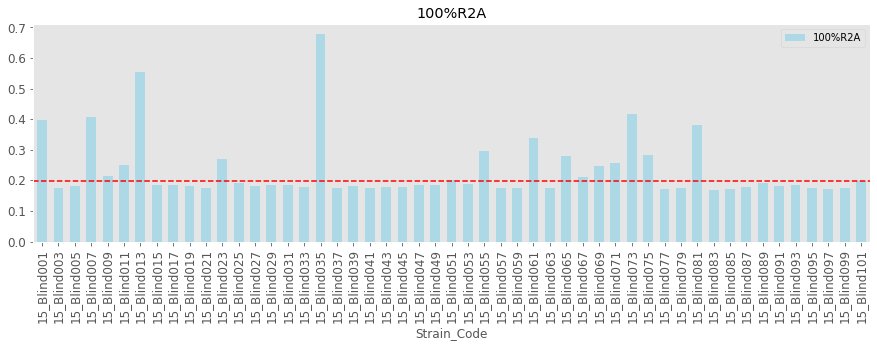

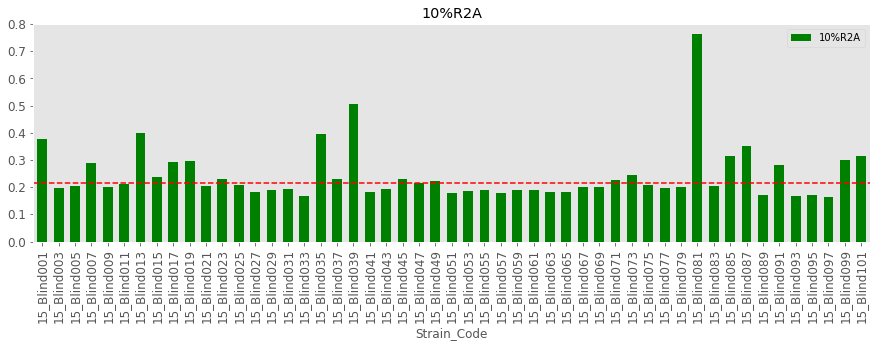

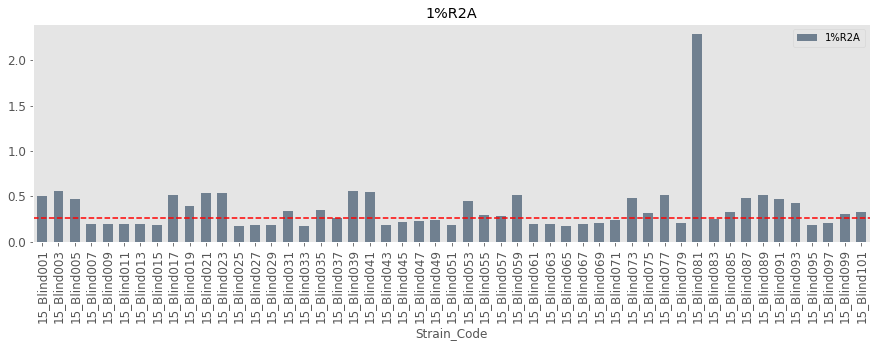

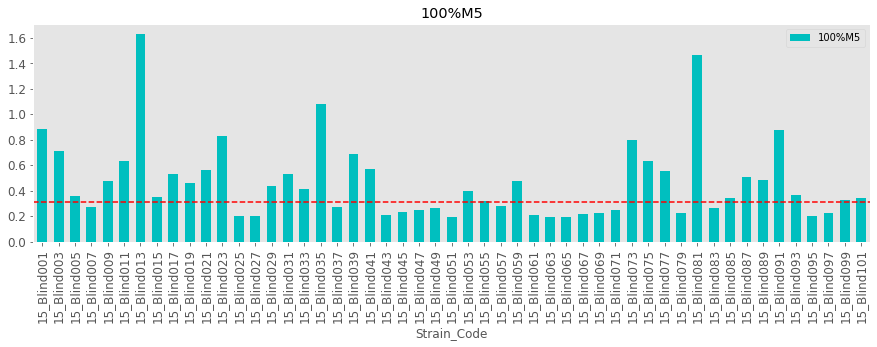

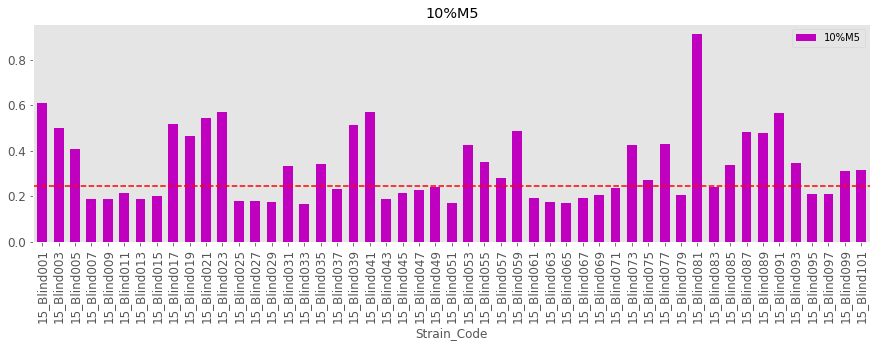

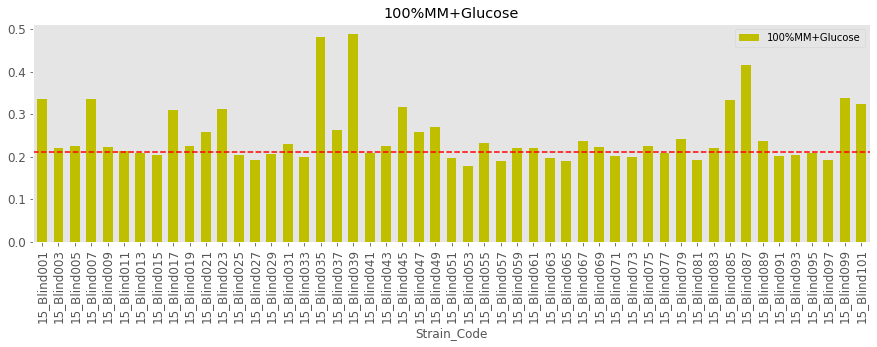

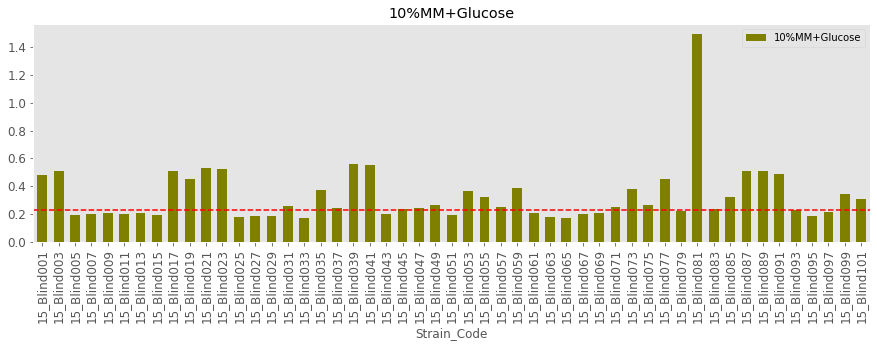

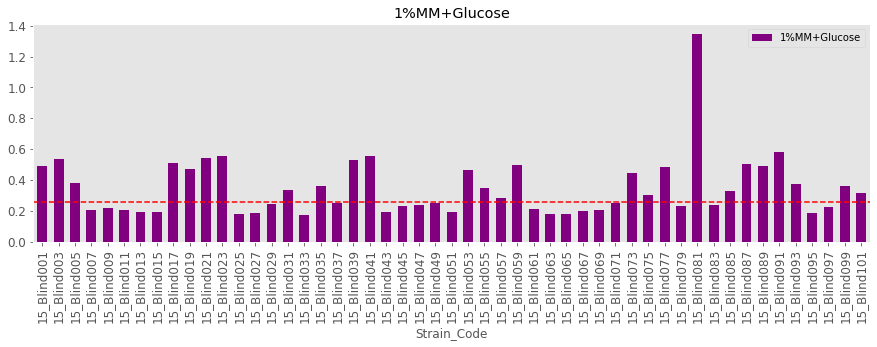

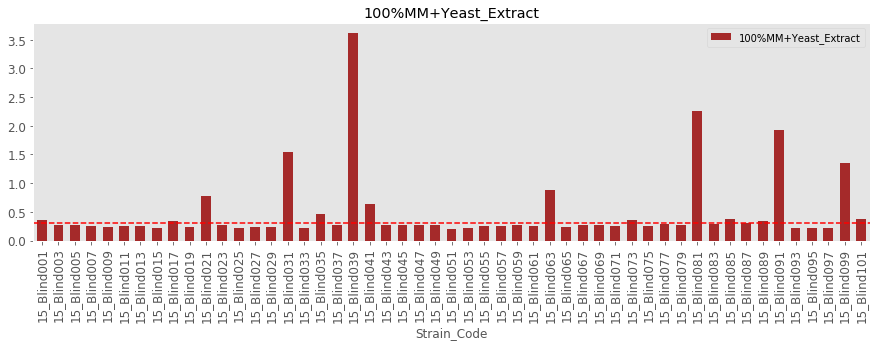

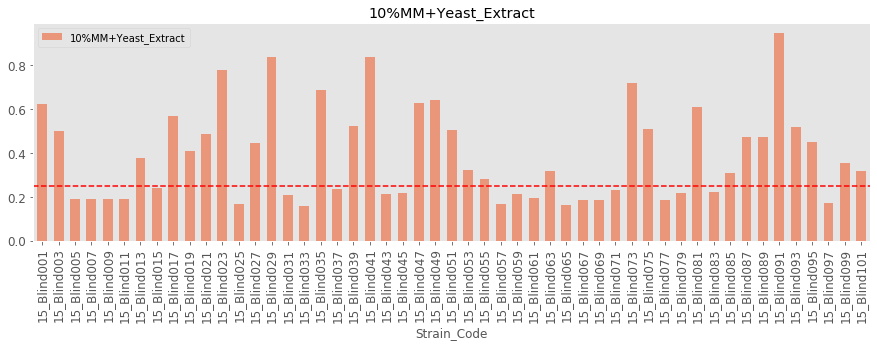

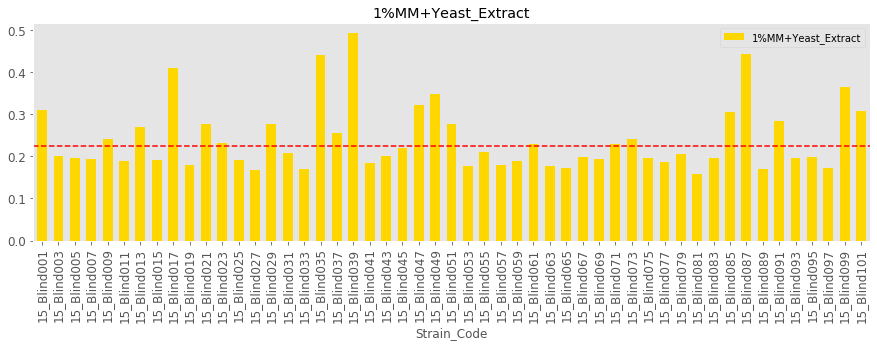

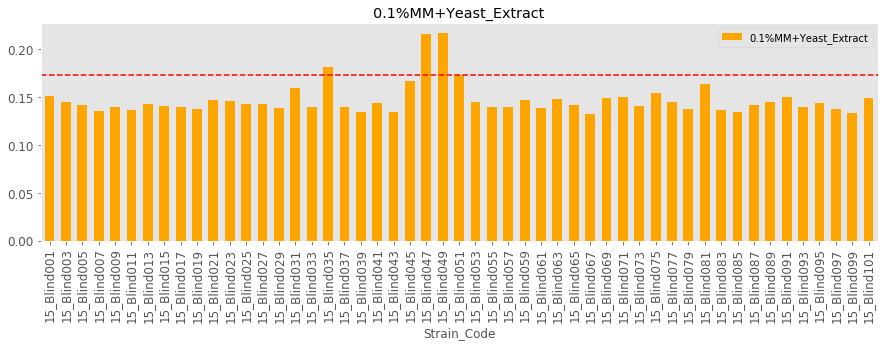

In [8]:
plt.style.use("ggplot")
colors = ("lightblue", "g", "slategrey", "c", "m", "y", "olive", "purple", "brown", "darksalmon", "gold", "orange")

columns_names = ["100%R2A", "10%R2A", "1%R2A","100%M5","10%M5","100%MM+Glucose","10%MM+Glucose","1%MM+Glucose","100%MM+Yeast_Extract","10%MM+Yeast_Extract","1%MM+Yeast_Extract","0.1%MM+Yeast_Extract"]
for column, margin, color  in zip(columns_names, A, colors):

    df3.plot(x="Strain_Code", y = column, kind='bar', sharey=False, sharex=True, subplots=True, legend=True, width=0.6, fontsize=12, color = color, grid=False, figsize=(15, 4), colormap='Dark2')

    plt.axhline(y = margin, color="r", linestyle='--')

As the plot shows, some of the wells, that were not subject to bacterial suspension implementation, were characterised by high optical dansity, the plates containing these wells should be eliminated

In [9]:
df1.head()

Strain_Code  100%R2A  10%R2A  1%R2A  100%M5  10%M5  100%MM+Glucose  \
0  1_Strain001    0.363   0.208  0.174   0.317  0.183           0.160   
1  1_Strain001    0.353   0.228  0.206   0.325  0.208           0.175   
2  1_Strain001    0.373   0.222  0.256   0.393  0.270           0.174   
3   1_Blind001    0.132   0.128  0.231   0.216  0.231           0.133   
4   1_Blind001    0.131   0.125  0.257   0.230  0.217           0.132   

   10%MM+Glucose  1%MM+Glucose  100%MM+Yeast_Extract  10%MM+Yeast_Extract  \
0          0.181         0.230                 0.232                0.228   
1          0.193         0.243                 0.258                0.264   
2          0.226         0.310                 0.260                0.232   
3          0.208         0.214                 0.160                0.231   
4          0.214         0.240                 0.168                0.206   

   1%MM+Yeast_Extract  0.1%MM+Yeast_Extract  
0               0.175                 0.143  
1               0.200                 0.163  
2               0.192                 0.155  
3               0.123                 0.105  
4               0.134                 0.109

After examining the Blind values of the suspected wells, we could devide the contamination into two different types:
Ponctual contamination of one of the parallel of the blinds(first or second)
Contamination of the two wells at the same time

In the first condition we wrote two functions that replace the values of the contaminated wells with the not contaminated ones
For the second condition the function deletes the values of the whole plate from the day where the contamination occured




In [10]:
def replacement_1_2(medium, coorx):
    for coor in range(coorx, 6120, 408):
        df1.loc[coor, medium] = df1.loc[coor + 1, medium]
    return df1

def replacement_2_1(medium, coorx):
    for coor in range(coorx, 6120, 408):
        df1.loc[coor + 1, medium] = df1.loc[coor, medium]
    return df1
def replacement_3(medium, coorx):
    for coor in range(coorx, 6120, 408):
        df1.loc[coor-3:coor+4, medium] = np.nan
    return df1

In [11]:
# for 100%R2A medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_100R2A = [3, 35, 859, 219, 267, 275, 283, 291]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_100R2A = [27, 51, 91, 243, 259]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_100R2A = [139, 1547, 3971]


In [12]:
for con in cont_1_100R2A:
    replacement_1_2("100%R2A", con)
for con in cont_2_100R2A:
    replacement_2_1("100%R2A", con)
for con in cont_3_100R2A:
    replacement_3("100%R2A", con)
    

    

In [13]:
# for 10%R2A medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_10R2A = [179]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_10R2A = [51, 75, 409, ]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_10R2A = [3827, 3963, 1547, 1995, 4483]


In [14]:
for con in cont_1_10R2A:
    replacement_1_2("10%R2A", con)
for con in cont_2_10R2A:
    replacement_2_1("10%R2A", con)
for con in cont_3_10R2A:
    replacement_3("10%R2A", con)

In [15]:
# for 1%R2A medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_1R2A = []
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_1R2A = []
# List of Blinds where we should eliminate the values of the whole plate
cont_3_1R2A = [3347, 3763, 3827, 3835, 4291, 5131, 3963, 307, 1547, 4827, 371]

In [16]:
for con in cont_3_1R2A:
    replacement_3("1%R2A", con)

In [17]:
# for 100M5 medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_100M5 = [11, 43, 51, 907, 123, 155, 89]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_100M5 = [35]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_100M5 = [3, 1275, 1955]

In [18]:
for con in cont_1_100M5:
    replacement_1_2("100%M5", con)
for con in cont_2_100M5:
    replacement_2_1("100%M5", con)
for con in cont_3_100M5:
    replacement_3("100%M5", con)

In [19]:
# for 10M5 medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_10M5 = [83]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_10M5 = [91, 163]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_10M5 = [5131, 307, 547, 1179, 2411]

In [20]:
for con in cont_1_10M5:
    replacement_1_2("10%M5", con)
for con in cont_2_10M5:
    replacement_2_1("10%M5", con)
for con in cont_3_10M5:
    replacement_3("10%M5", con)

In [21]:
# for 100%MM+Glucose medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_100Glucose = [2883]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_100Glucose = []
# List of Blinds where we should eliminate the values of the whole plate
cont_3_100Glucose = []

In [22]:
for con in cont_1_100Glucose:
    replacement_1_2("100%MM+Glucose", con)
for con in cont_2_100Glucose:
    replacement_2_1("100%MM+Glucose", con)
for con in cont_3_100Glucose:
    replacement_3("100%MM+Glucose", con)

In [23]:
# for 10%MM+Glucose medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_10Glucose = []
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_10Glucose = []
# List of Blinds where we should eliminate the values of the whole plate
cont_3_10Glucose = [1139]

In [24]:
for con in cont_3_10Glucose:
    replacement_3("10%MM+Glucose", con)

In [25]:
# for 1%MM+Glucose medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_1Glucose = []
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_1Glucose = []
# List of Blinds where we should eliminate the values of the whole plate
cont_3_1Glucose = [1139]

In [26]:
for con in cont_3_1Glucose:
    replacement_3("1%MM+Glucose", con)

In [27]:
# for 100%MM+Yeast_Extract medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_100Yeast_Extract = [123, 571, 1883, 2027]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_100Yeast_Extract = [3755, 4891]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_100Yeast_Extract = [155, 1547]

In [28]:
for con in cont_1_100Yeast_Extract:
    replacement_1_2("100%MM+Yeast_Extract", con)
for con in cont_2_100Yeast_Extract:
    replacement_2_1("100%MM+Yeast_Extract", con)
for con in cont_3_100Yeast_Extract:
    replacement_3("100%MM+Yeast_Extract", con)

In [29]:
# for 10%MM+Yeast_Extract medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_10Yeast_Extract = [67, 907, 955, 979, 595, 195, 203, 2411]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_10Yeast_Extract = [923, 3147, 5355, 2011]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_10Yeast_Extract = [1547, 1179]

In [30]:
for con in cont_1_10Yeast_Extract:
    replacement_1_2("10%MM+Yeast_Extract", con)
for con in cont_2_10Yeast_Extract:
    replacement_2_1("10%MM+Yeast_Extract", con)
for con in cont_3_10Yeast_Extract:
    replacement_3("10%MM+Yeast_Extract", con)

In [31]:
# for 1%MM+Yeast_Extract medium

# List of Blinds where we should change the second value of the parallel with the first one
cont_1_1Yeast_Extract = [51]
# List of Blinds where we should change the second value of the parallel with the first one
cont_2_1Yeast_Extract = [45, 49]
# List of Blinds where we should eliminate the values of the whole plate
cont_3_1Yeast_Extract = [1995]

In [32]:
for con in cont_1_1Yeast_Extract:
    replacement_1_2("1%MM+Yeast_Extract", con)
for con in cont_2_1Yeast_Extract:
    replacement_2_1("1%MM+Yeast_Extract", con)
for con in cont_3_1Yeast_Extract:
    replacement_3("1%MM+Yeast_Extract", con)

In [33]:
df6 = df1.groupby(["Strain_Code"], as_index=False).mean()


In [34]:
df6[["Date","Strain"]] = df6.Strain_Code.str.split("_",expand=True,)

In [35]:
df6["Date"] = df6["Date"].astype(str).astype(int)


In [36]:
df7 = df6.sort_values(["Date","Strain"])

In [37]:
df7.reset_index(inplace = True, drop = True)

After sorting the dataframe, we can now substruct the obtained values of the different strains from the blinds, in order to obtain the values of the growth of each strain

In [38]:
# Indexes of the Blinds based on the weeks in df7:
#zeroes
week_1_B_idx = [i for i in range(0,51) for _ in range(2)]
week_2_B_idx = [i for i in range(153,204) for _ in range(2)]
week_3_B_idx = [i for i in range(306,357) for _ in range(2)]
week_4_B_idx = [i for i in range(459,510) for _ in range(2)]
week_5_B_idx = [i for i in range(612,663) for _ in range(2)]
week_6_B_idx = [i for i in range(765,816) for _ in range(2)]
week_7_B_idx = [i for i in range(918,969) for _ in range(2)]
week_8_B_idx = [i for i in range(1071,1122) for _ in range(2)]
week_9_B_idx = [i for i in range(1224,1275) for _ in range(2)]
week_10_B_idx = [i for i in range(1377,1428) for _ in range(2)]
week_11_B_idx = [i for i in range(1530,1581) for _ in range(2)]
week_12_B_idx = [i for i in range(1683,1734) for _ in range(2)]
week_13_B_idx = [i for i in range(1836,1887) for _ in range(2)]
week_14_B_idx = [i for i in range(1989,2040) for _ in range(2)]
week_15_B_idx = [i for i in range(2142,2193) for _ in range(2)]

#Indexes of the strain based on the weeks in df7
week_1_S = range(51,153)
week_2_S = range(204,306)
week_3_S = range(357,459)
week_4_S = range(510,612)
week_5_S = range(663,765)
week_6_S = range(816,918)
week_7_S = range(969,1071)
week_8_S = range(1122,1224)
week_9_S = range(1275,1377)
week_10_S = range(1428,1530)
week_11_S = range(1581,1683)
week_12_S = range(1734,1836)
week_13_S = range(1887,1989)
week_14_S = range(2040,2142)
week_15_S = range(2193,2295)


Strain_names = ["S. hongtaonis","P. sinopodophylli","R. alvei","D.koreensis","M. osloensis","P. herbae","S. tateyamensis",
"M. tumbae","B. nitrificans","B. eneae","P. algae","M. keratanolyticum","A. rudongensis","P. tundrae","F. roseus",
"S. aquiterrae","R. mesophila","S. rhizosphaerihabitans","B. circulans","V. boronicumulans","P. giardinii","P. miscanthi",
"D. hamtensis","V. spinosum","M. lutea","S. aerolata","B simplex","S. scabiei","V. paradoxus","F. soli",
"L. fusiformis","B. mycoides","A. largimobile","C. mirabilis","B. terrae","P. typhae","T. mepensis","B. timonensis",
"P. lini","S. umbrinus","R.mucosa","F. granuli","H. ginsengi","A. fucosus","E. adhaerens","P. aceris","B. vesicularis",
"M. paraoxydans","M. oxydans","P. acridae","A. altamirensis","N. lindaniclasticum","F. mizutaii","P. haematequi",
"B. robiniae","A. deleyi","P. populi","B. idriensis","C. delicatus","R. antarcticus","H. taeniospiralis","P. wadenswilerensis",
"D. riboflavina","P. tritici","F. sasangense","R. limnophila","R. aquatica","B. denitrificans","D. insulae","F. barbaricus",
"B. butanolivorans","B. licheniformis","Y. alkaliphila","D. submarina","P. sinensis","R. azotoformans","A. minutum",
"C. oligotrophica","A. commune","A. temperans","A. aquaticum","D. sediminis","M. spinosa","A. citratiphilum","A. troitsensis",
"J. campisalis","K. radiotolerans","M.pseudosasae","N. ramosa","P. mexicana","M. album","S. chilensis","S. solisilvae",
"S.hunanensis","S. fribergensis","S. koreensis","P. psychrotolerans","S. korensis","M. yunnanensis","A. pittii","P. zeshuii", "deleate_me"]

In [39]:
# week_prefix = []
# for x in range(1, 16):
#     week_prefix.append("D_" + str(x) + "_")
# week_prefix = [i for i in week_prefix for _ in range(102)]

# c = Strain_names * 15
# week_names = []

# for j, i in zip(week_prefix,Strain_names * 15) :

#         week_names.append(j + i)

In [40]:
df8 = pd.DataFrame()
def subtructing(zero, Bacteria, Strain_names):
    global df8
    
    for Blind, Strain, Name in zip(zero, Bacteria, Strain_names):

        df8 = pd.concat([(pd.DataFrame(df7.loc[Strain,
        columns_names]).T).subtract(pd.DataFrame(df7.loc[Blind,columns_names]).T.squeeze()), df8])
    
        df8.rename(index={Strain:Name}, inplace = True)
    return df8

In [41]:
subtructing(week_1_B_idx, week_1_S, Strain_names)
subtructing(week_2_B_idx, week_2_S, Strain_names)
subtructing(week_3_B_idx, week_3_S, Strain_names)
subtructing(week_4_B_idx, week_4_S, Strain_names)
subtructing(week_5_B_idx, week_5_S, Strain_names)
subtructing(week_6_B_idx, week_6_S, Strain_names)
subtructing(week_7_B_idx, week_7_S, Strain_names)
subtructing(week_8_B_idx, week_8_S, Strain_names)
subtructing(week_9_B_idx, week_9_S, Strain_names)
subtructing(week_10_B_idx, week_10_S, Strain_names)
subtructing(week_11_B_idx, week_11_S, Strain_names)
subtructing(week_12_B_idx, week_12_S, Strain_names)
subtructing(week_13_B_idx, week_13_S, Strain_names)
subtructing(week_14_B_idx, week_14_S, Strain_names)
subtructing(week_15_B_idx, week_15_S, Strain_names)

100%R2A     10%R2A        1%R2A     100%M5       10%M5  \
deleate_me             -0.01        NaN   -0.0271667 -0.0548333  -0.0551667   
P. zeshuii         0.0566667        NaN      -0.0215   0.113833 -0.00116667   
A. pittii              0.248  0.0608333  0.000333333   0.455167       0.077   
M. yunnanensis         0.322   0.147167        0.115   0.450833    0.157333   
S. korensis             0.23     0.0975        0.021   0.533333      0.1045   
...                      ...        ...          ...        ...         ...   
M. osloensis        0.147333  0.0116667   0.00983333   0.115833      0.0315   
D.koreensis           0.3395  0.0553333   -0.0496667      0.297   0.0153333   
R. alvei            0.266167  0.0593333   -0.0503333      0.204 -0.00266667   
P. sinopodophylli      0.127  0.0818333   -0.0203333        NaN      -0.013   
S. hongtaonis          0.232  0.0928333       -0.032        NaN -0.00366667   

                  100%MM+Glucose 10%MM+Glucose 1%MM+Glucose  \
deleate_me               -0.0095   -0.00883333      -0.0255   
P. zeshuii             0.0978333     0.0541667   -0.0151667   
A. pittii                   0.04     0.0161667   0.00516667   
M. yunnanensis          0.534667      0.596833     0.303833   
S. korensis               0.0915         0.117    0.0956667   
...                          ...           ...          ...   
M. osloensis          0.00816667     0.0206667    0.0223333   
D.koreensis               0.1895      0.214167        0.073   
R. alvei               0.0638333     0.0741667    0.0316667   
P. sinopodophylli         0.1185    -0.0183333   -0.0163333   
S. hongtaonis          0.0371667        -0.011        0.034   

                  100%MM+Yeast_Extract 10%MM+Yeast_Extract 1%MM+Yeast_Extract  \
deleate_me                    0.240667             -0.0315            -0.0325   
P. zeshuii                     1.05767           0.0918333         -0.0131667   
A. pittii                        1.497               0.418              0.048   
M. yunnanensis                   1.426               0.239              0.133   
S. korensis                   0.955333            0.418667              0.084   
...                                ...                 ...                ...   
M. osloensis                     0.206           0.0938333          0.0251667   
D.koreensis                   0.280667            0.262167             0.0425   
R. alvei                      0.137667              0.3185          0.0681667   
P. sinopodophylli             0.576667              0.0685             0.0645   
S. hongtaonis                    0.086           0.0228333             0.0605   

                  0.1%MM+Yeast_Extract  
deleate_me                  0.00383333  
P. zeshuii                  0.00216667  
A. pittii                       0.0275  
M. yunnanensis                0.114833  
S. korensis                  0.0491667  
...                                ...  
M. osloensis                 0.0176667  
D.koreensis                  0.0173333  
R. alvei                     0.0216667  
P. sinopodophylli            0.0696667  
S. hongtaonis                0.0466667  

[1530 rows x 12 columns]

In [42]:
df8["Strain_name"] = df8.index

In [43]:
df8.reset_index(drop=True, inplace = True)

In [44]:
df8["Index"] = df8.index

In [45]:
df8.sort_values(["Strain_name","Index"],ascending=False, inplace=True)
df8.reset_index(drop=True, inplace = True)

In [46]:
df8.head()

100%R2A      10%R2A        1%R2A      100%M5        10%M5  \
0 -0.000333333      -0.002  -0.00433333 -0.00166667 -0.000166667   
1   -0.0476667     -0.0465   -0.0398333     -0.0225      -0.0115   
2       -0.028  -0.0381667   -0.0273333      -0.023       -0.011   
3   -0.0143333  -0.0313333      -0.0195  -0.0103333       0.0005   
4       0.0015  0.00433333  0.000666667      0.0015  0.000333333   

  100%MM+Glucose 10%MM+Glucose 1%MM+Glucose 100%MM+Yeast_Extract  \
0    0.000166667   -0.00166667   0.00816667            0.0156667   
1     -0.0178333    -0.0226667       -0.019             0.194167   
2         -0.023       -0.0175   -0.0156667             0.308333   
3        -0.0085   -0.00483333  -0.00116667             0.337333   
4         0.0035       -0.0025       -0.001             0.275167   

  10%MM+Yeast_Extract 1%MM+Yeast_Extract 0.1%MM+Yeast_Extract Strain_name  \
0         0.000166667        -0.00283333          -0.00316667  deleate_me   
1          -0.0401667         -0.0508333           -0.0298333  deleate_me   
2          -0.0378333         -0.0401667           -0.0306667  deleate_me   
3          -0.0216667         -0.0323333           -0.0113333  deleate_me   
4         -0.00133333        -0.00333333               -0.004  deleate_me   

   Index  
0   1428  
1   1326  
2   1224  
3   1122  
4   1020

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


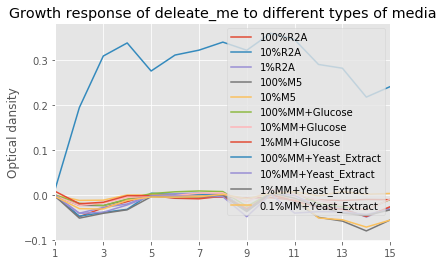

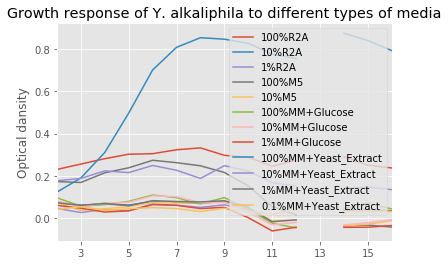

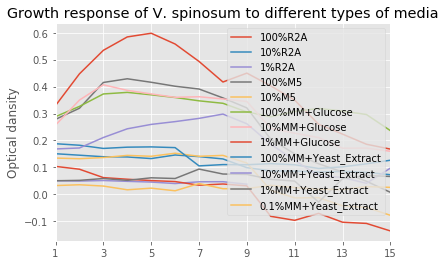

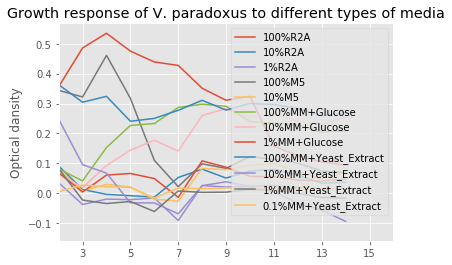

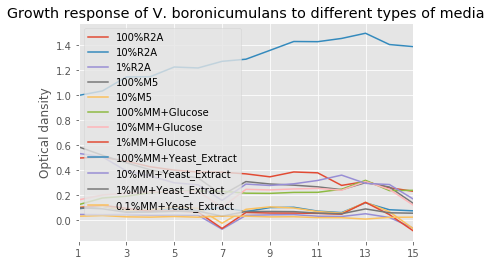

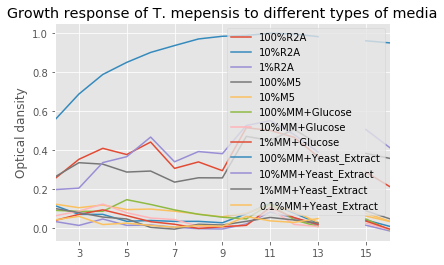

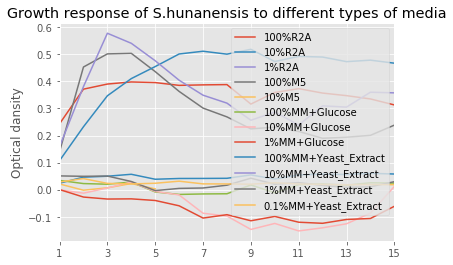

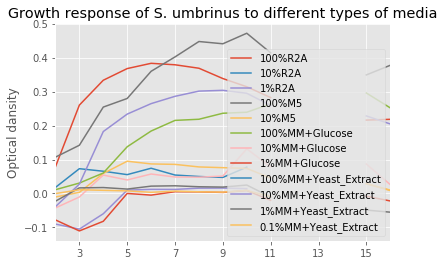

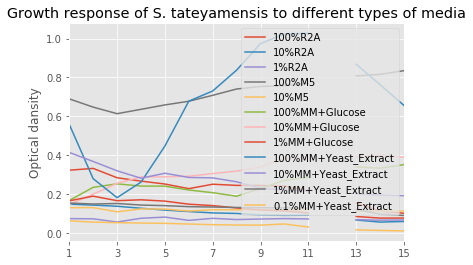

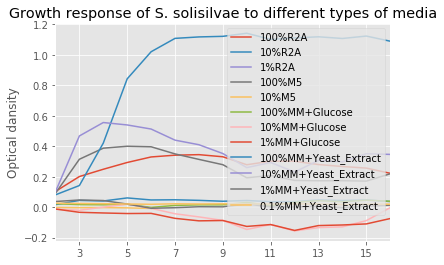

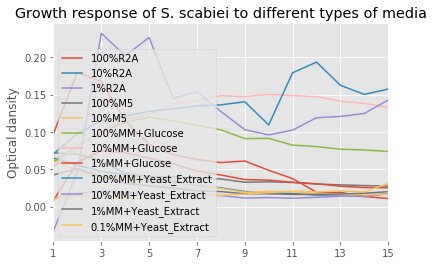

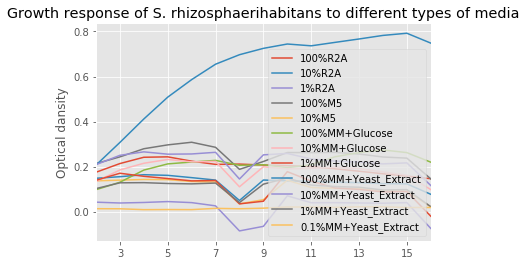

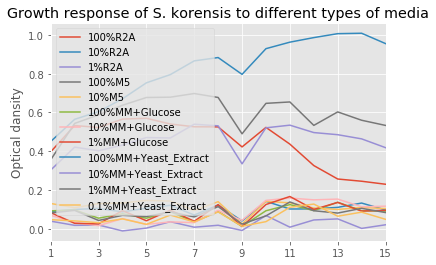

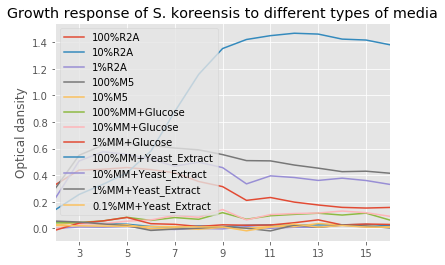

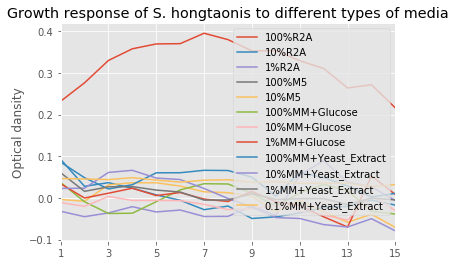

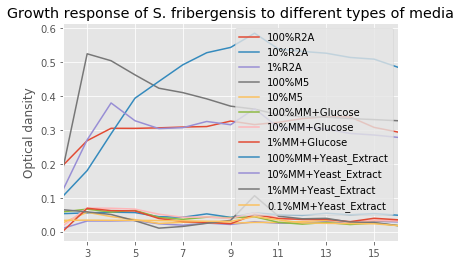

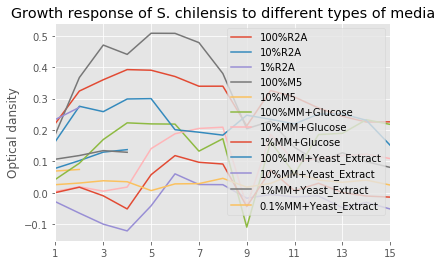

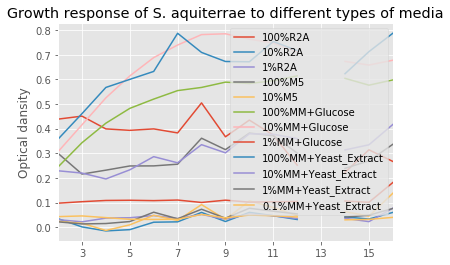

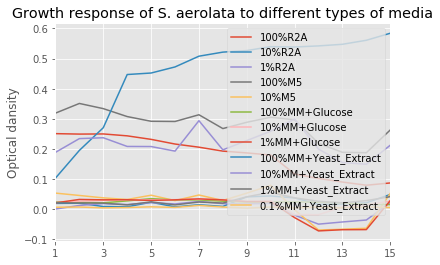

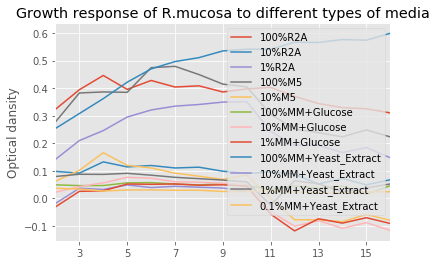

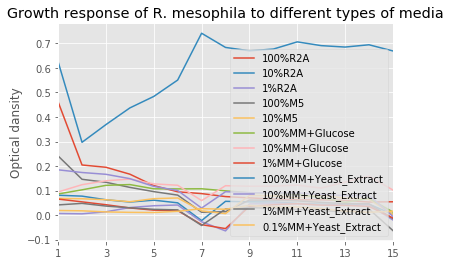

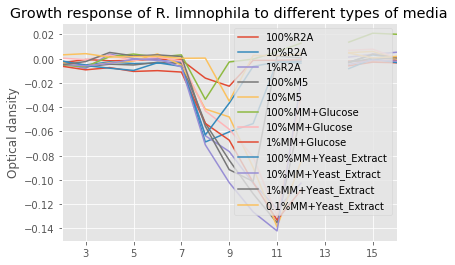

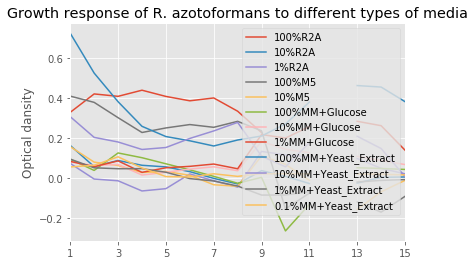

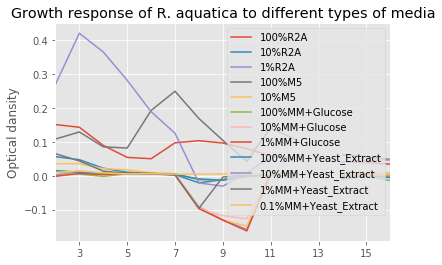

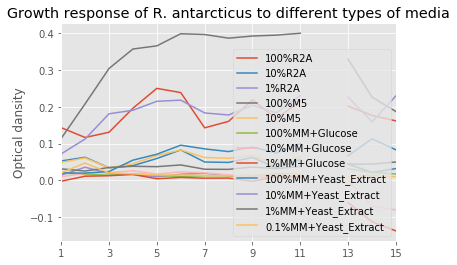

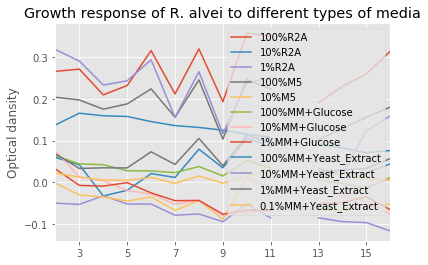

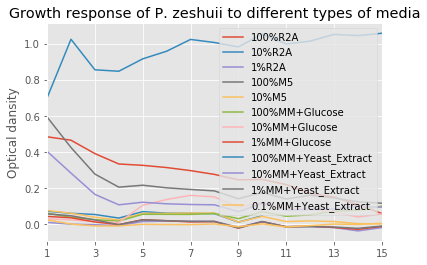

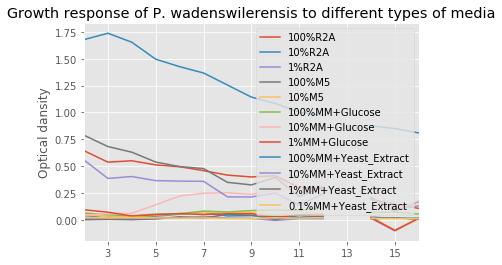

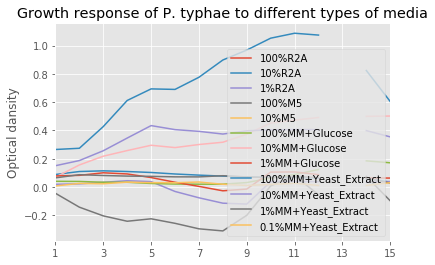

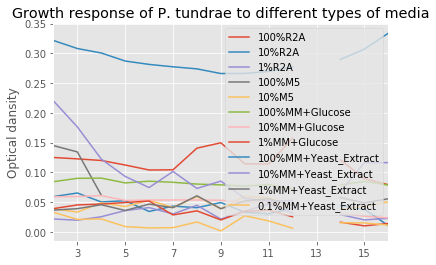

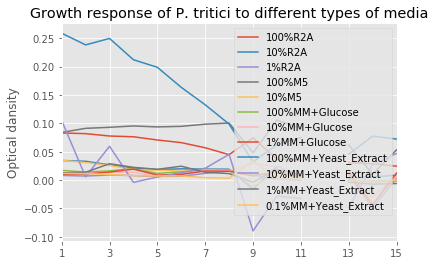

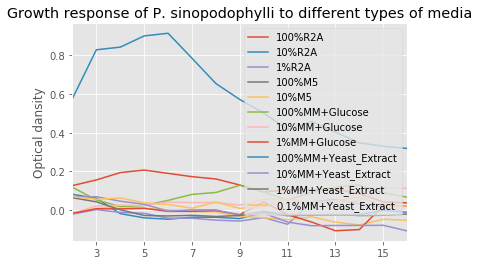

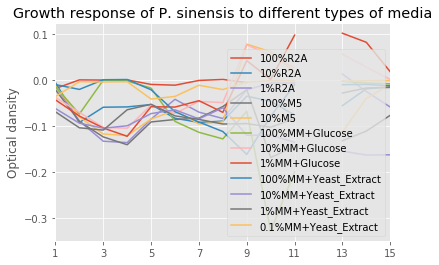

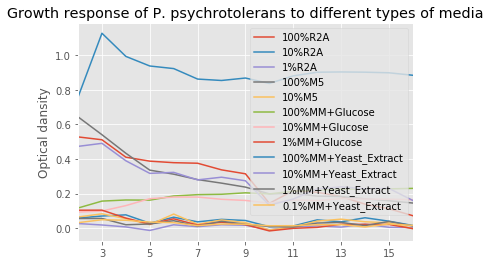

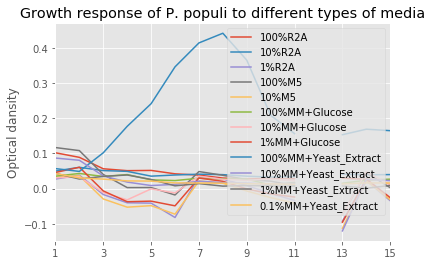

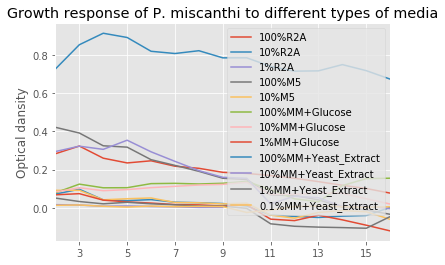

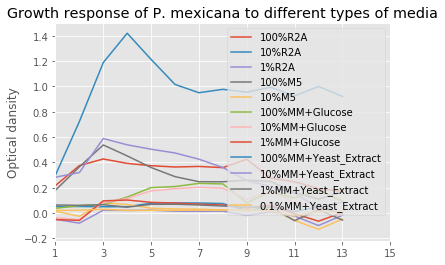

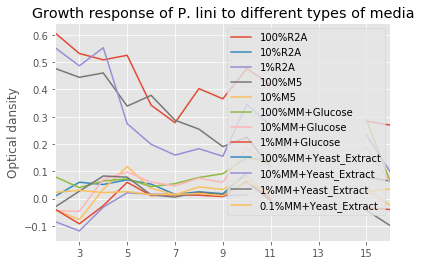

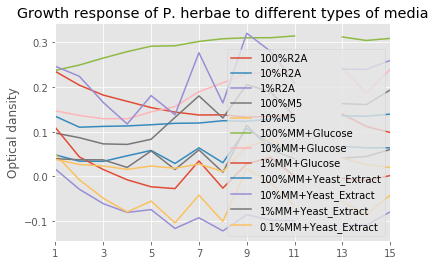

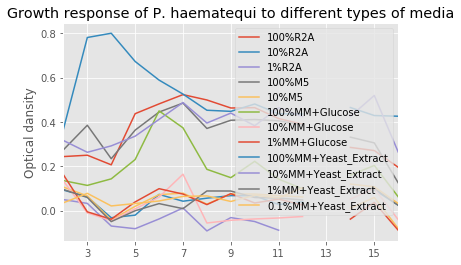

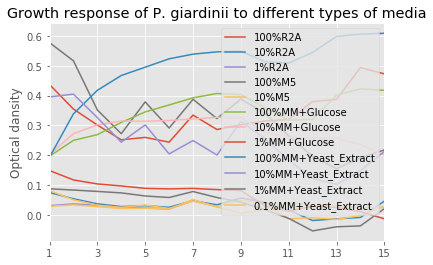

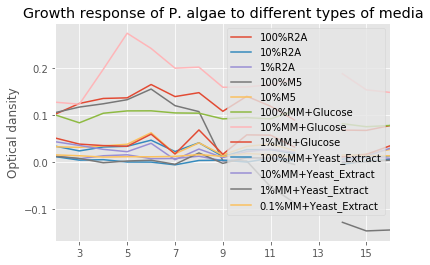

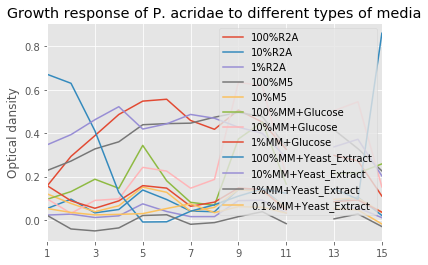

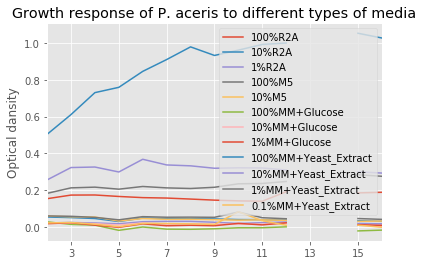

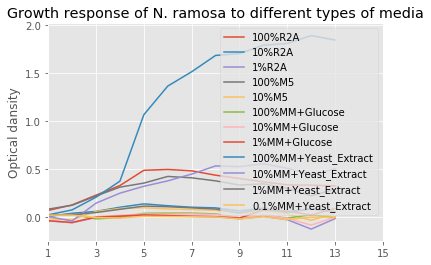

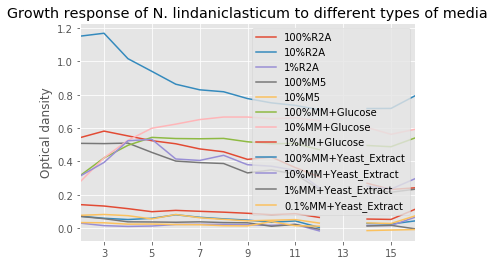

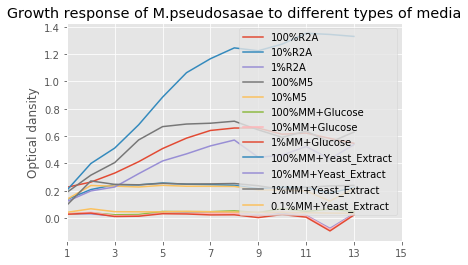

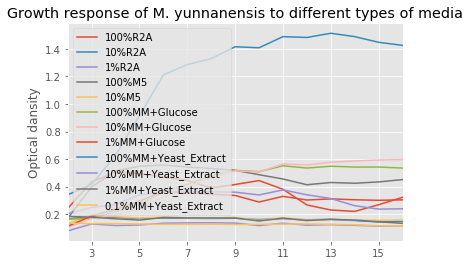

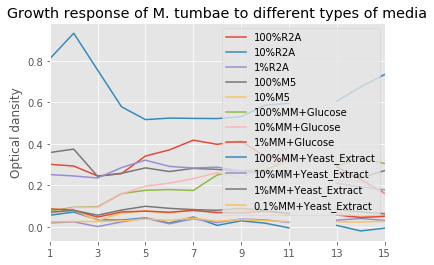

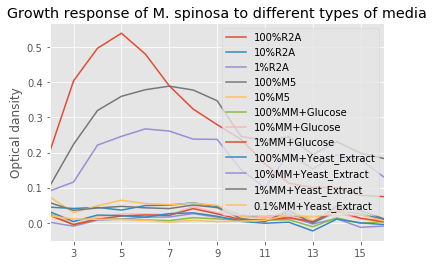

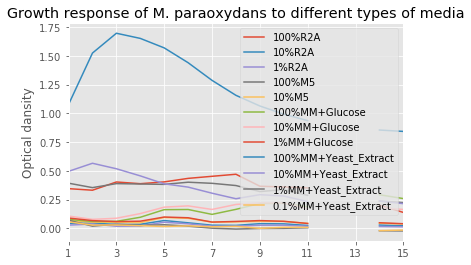

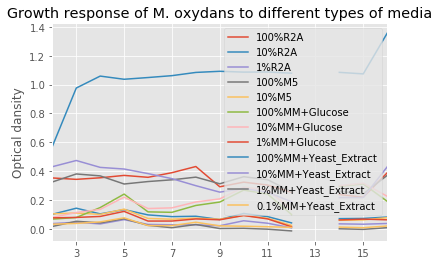

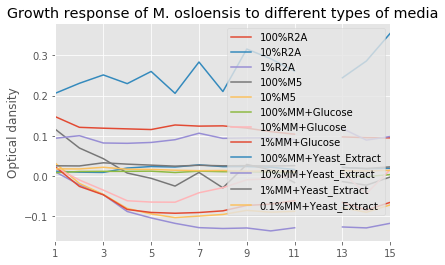

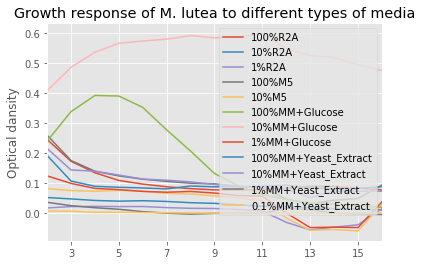

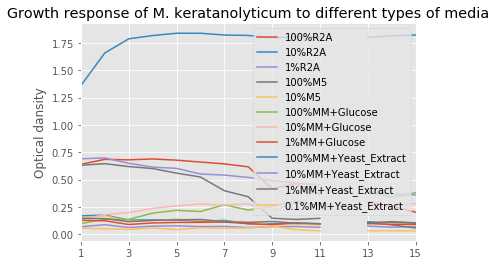

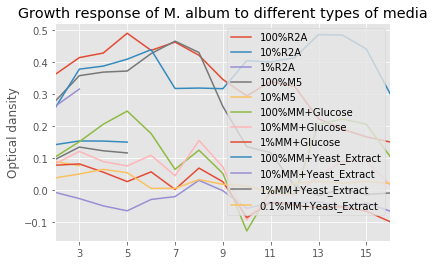

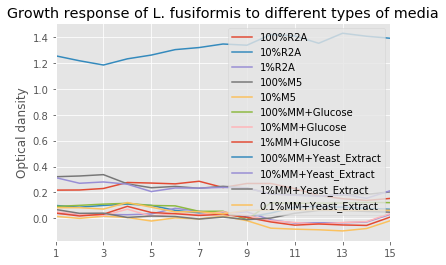

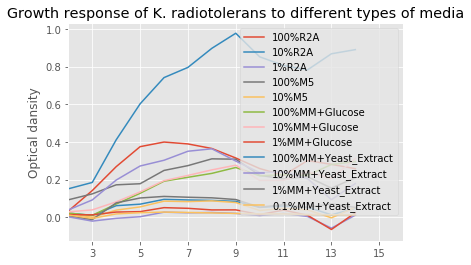

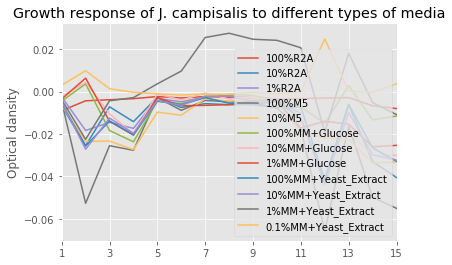

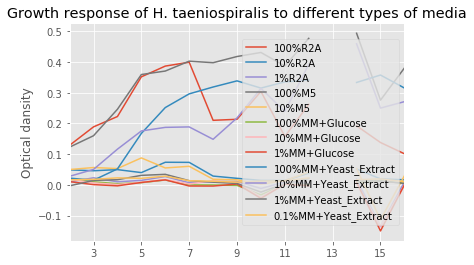

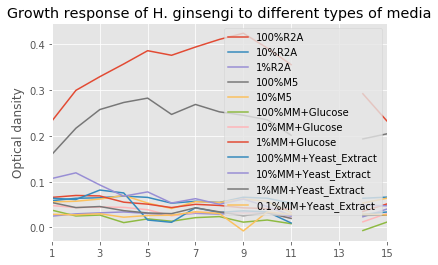

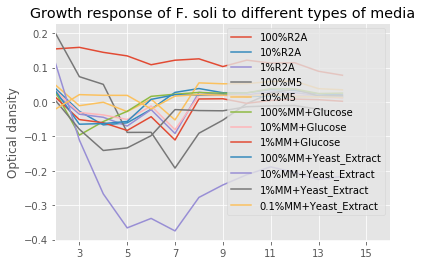

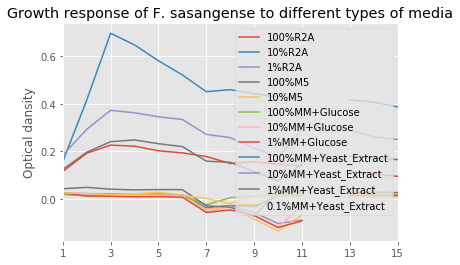

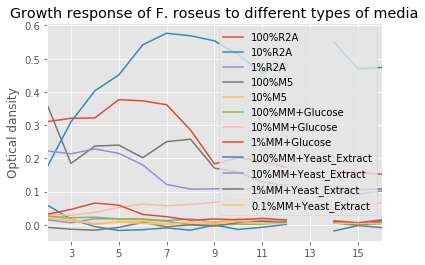

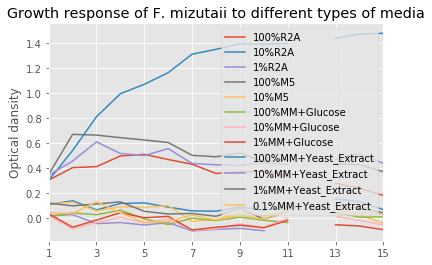

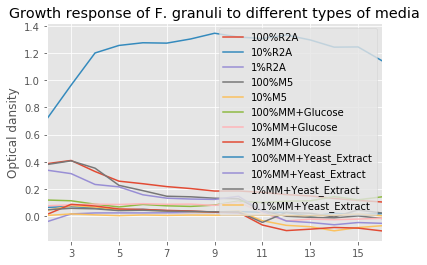

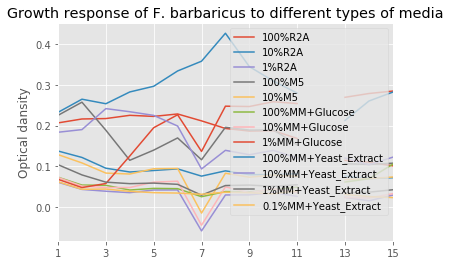

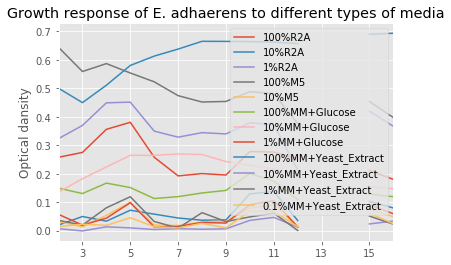

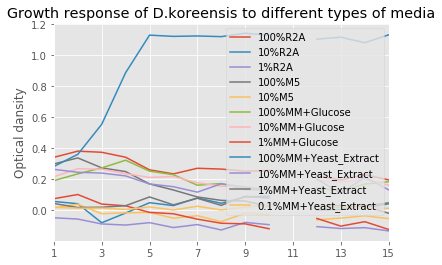

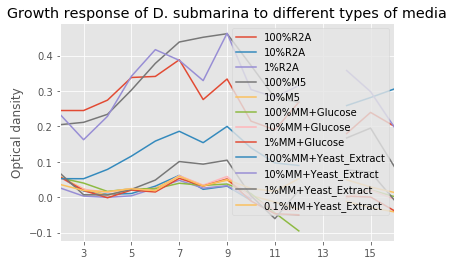

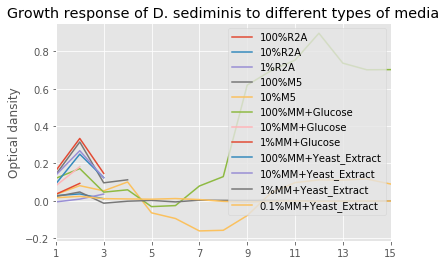

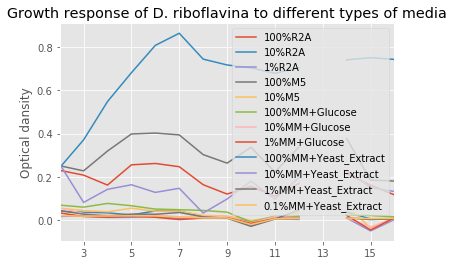

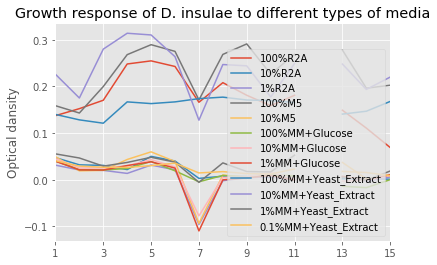

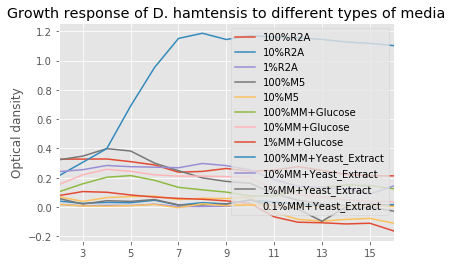

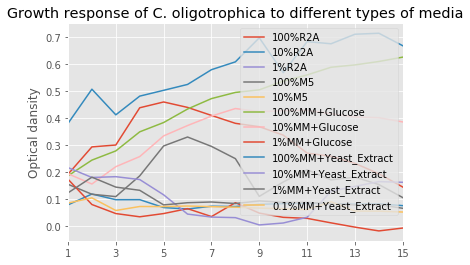

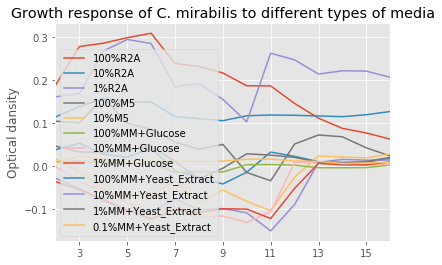

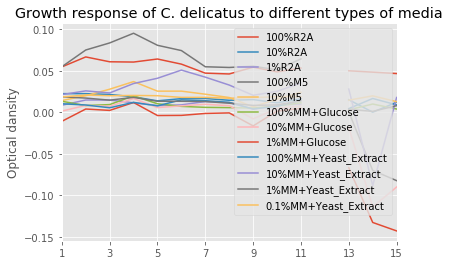

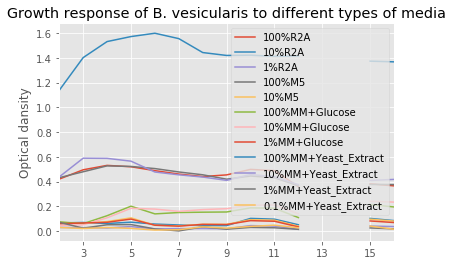

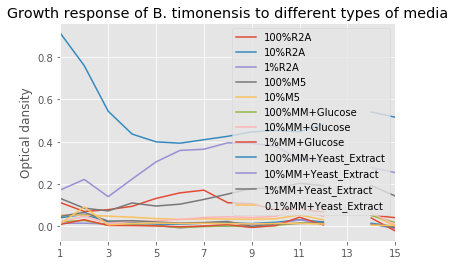

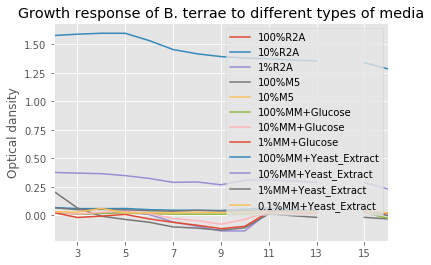

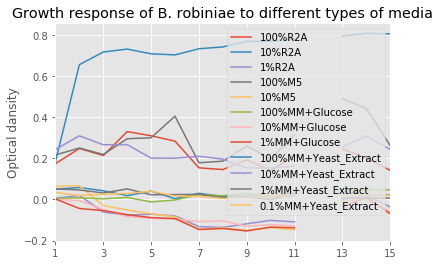

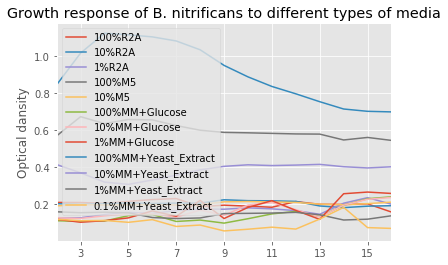

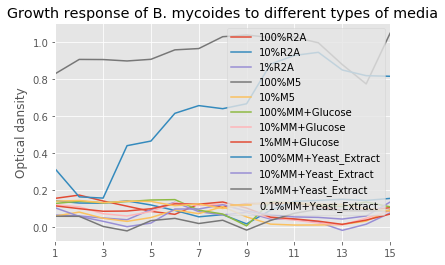

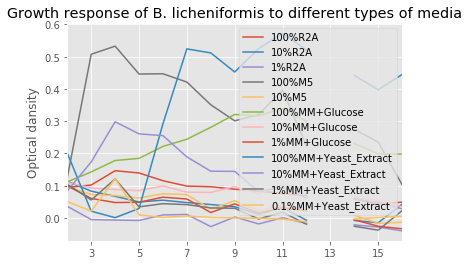

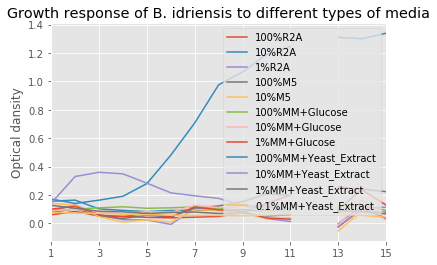

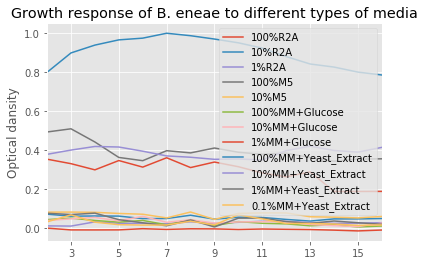

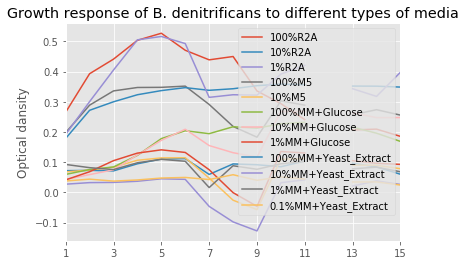

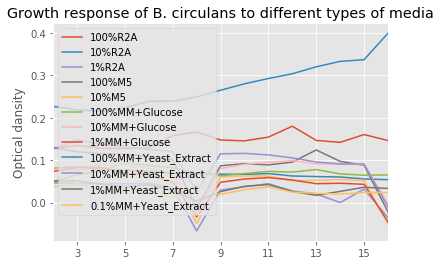

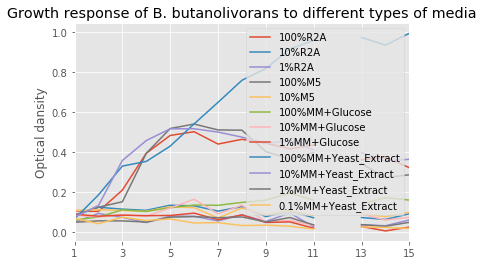

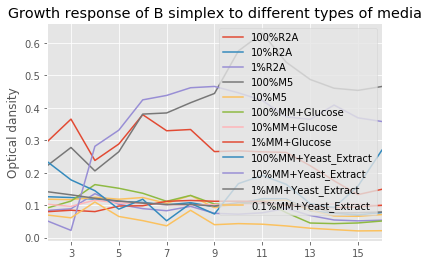

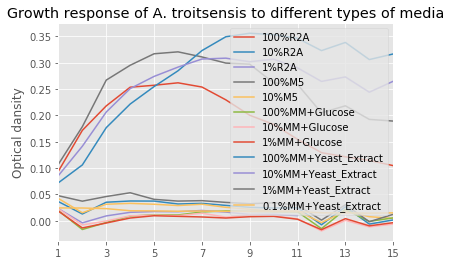

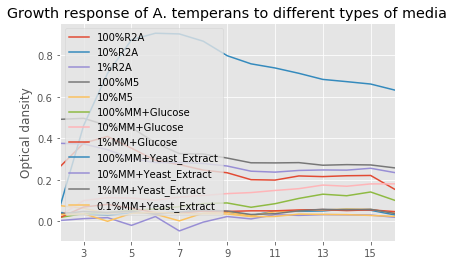

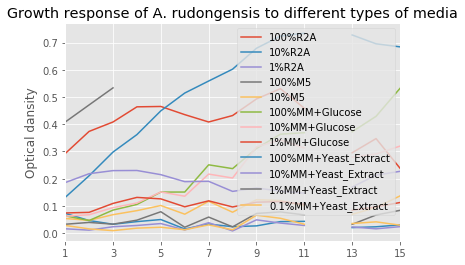

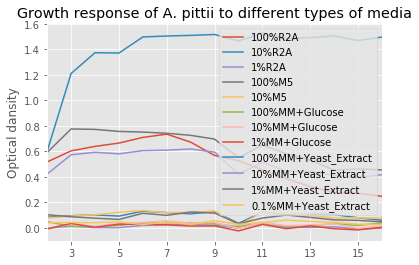

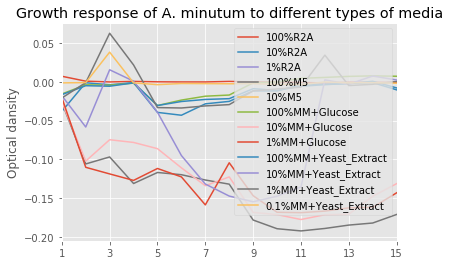

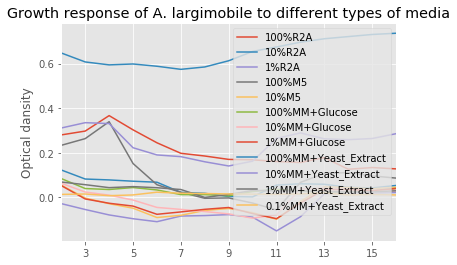

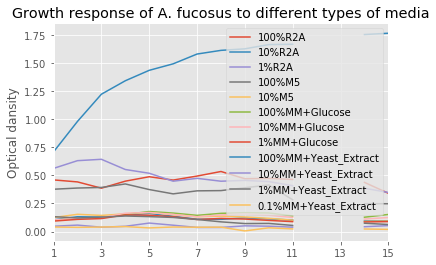

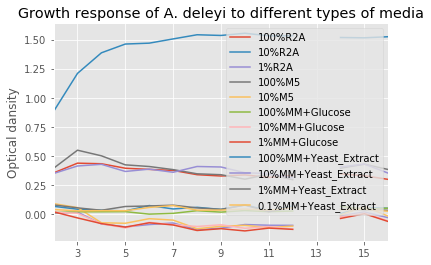

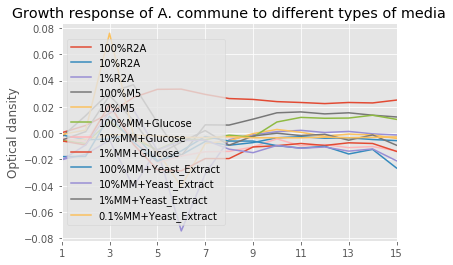

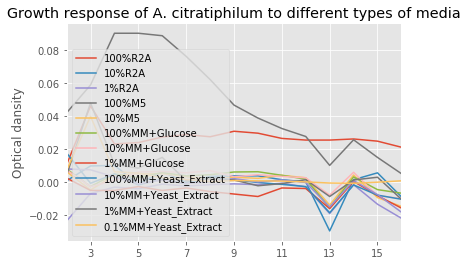

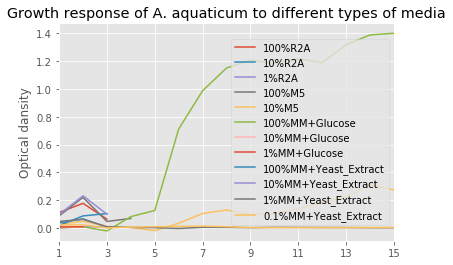

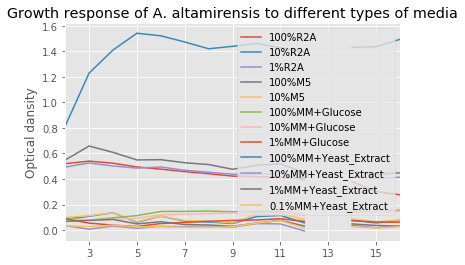

In [47]:
for i in range(0, 1530, 15):
    fig = df8.iloc[i:i+15].plot(y=columns_names)
    fig.set_title("Growth response of {} to different types of media".format(df8.loc[i, "Strain_name"]))
    fig.set_ylabel("Optical dansity")
    labels = [1,3,5,7,9,11,13,15]
    fig.set_xticklabels(labels)
    
#df8.iloc[0:15].plot.kde(y=columns_names)
#df8.iloc[15:31].plot(y=columns_names)
#df8.iloc[31:45].plot(y=columns_names)
#df8.iloc[45:60].plot(y=columns_names)




In order to be able to visualize all the strains and the relations among them, we will proceed first to a PCA.
(changing the NaN values is necessary before the implementation of the data into the model)

In [48]:
features = columns_names
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df8.loc[:, features].values)
SimpleImputer()
a = imp_mean.transform(df8.loc[:, features].values)

In [49]:
from sklearn.preprocessing import StandardScaler


y = df8.loc[:,["Strain_name"]].values
x = StandardScaler().fit_transform(a)


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [51]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [52]:
finalDf = pd.concat([principalDf, df8[["Strain_name"]]], axis = 1)
finalDf1 = finalDf.groupby(["Strain_name"], as_index=False).mean()

In [53]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

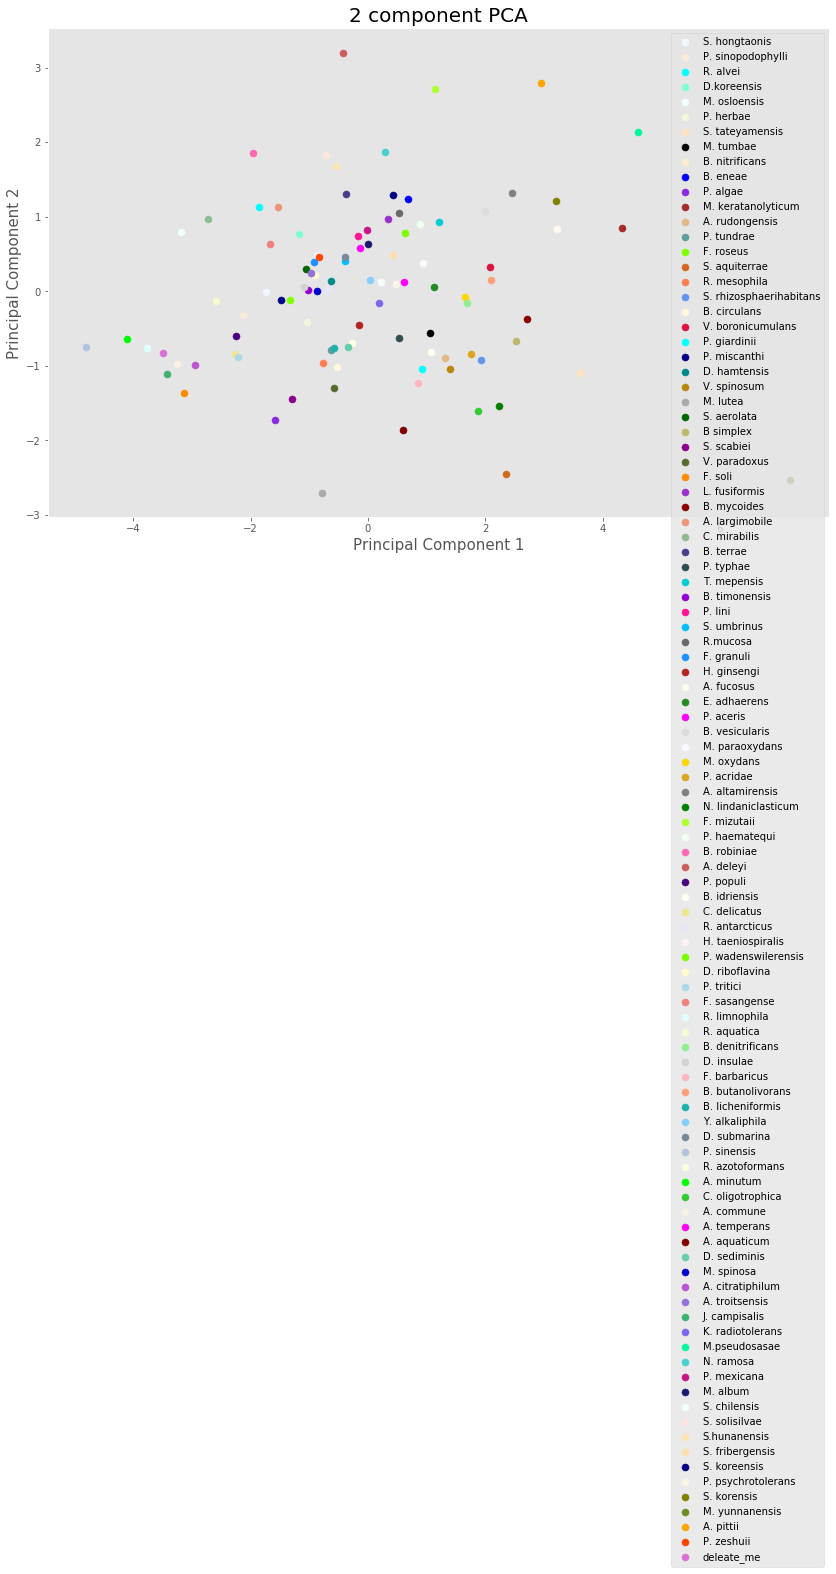

In [54]:

fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = Strain_names
colors = cnames
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1["Strain_name"] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'principal component 1']
               , finalDf1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [55]:
pca.explained_variance_ratio_

array([0.45592506, 0.14157184])